In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, f1_score


def load_data_from_file(file='preprocessed_data_cropped.npz'):
    data = np.load(file)
    return data['X'], data['y']

def create_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Load preprocessed data
X, y = load_data_from_file()



# Split the data into training and testing sets
X_train = X[:39209]
y_train = y[:39209]
X_test = X[39209:]
y_test = y[39209:]

# Get input shape and number of classes
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

f1_scores = []
accuracies = []
histories = []


model = create_cnn(input_shape, num_classes)

history = model.fit(X_train, y_train, batch_size=32, epochs=10)
histories.append(history)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate performance metrics
f1 = f1_score(y_true_classes, y_pred_classes, average="weighted")
accuracy = accuracy_score(y_true_classes, y_pred_classes)
f1_scores.append(f1)
accuracies.append(accuracy)

print("cnn Test Accuracy:", accuracy)





Epoch 1/10
1226/1226 [==============================] - 16s 13ms/step - loss: 1.3936 - accuracy: 0.6097
Epoch 2/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.3795 - accuracy: 0.8852
Epoch 3/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.2480 - accuracy: 0.9226
Epoch 4/10
1226/1226 [==============================] - 15s 13ms/step - loss: 0.1832 - accuracy: 0.9423
Epoch 5/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.1417 - accuracy: 0.9556
Epoch 6/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.1222 - accuracy: 0.9615
Epoch 7/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0996 - accuracy: 0.9685
Epoch 8/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0924 - accuracy: 0.9707
Epoch 9/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0798 - accuracy: 0.9750
Epoch 10/10
395/395 [==============================] - 3s 7ms/st

Epoch 1/10
1226/1226 [==============================] - 17s 13ms/step - loss: 1.3520 - accuracy: 0.6200
Epoch 2/10
1226/1226 [==============================] - 20s 17ms/step - loss: 0.3890 - accuracy: 0.8802
Epoch 3/10
1226/1226 [==============================] - 19s 15ms/step - loss: 0.2459 - accuracy: 0.9245
Epoch 4/10
1226/1226 [==============================] - 23s 19ms/step - loss: 0.1785 - accuracy: 0.9458
Epoch 5/10
1226/1226 [==============================] - 25s 20ms/step - loss: 0.1446 - accuracy: 0.9554
Epoch 6/10
1226/1226 [==============================] - 24s 19ms/step - loss: 0.1228 - accuracy: 0.9626
Epoch 7/10
1226/1226 [==============================] - 25s 21ms/step - loss: 0.1011 - accuracy: 0.9691
Epoch 8/10
1226/1226 [==============================] - 18s 15ms/step - loss: 0.0899 - accuracy: 0.9716
Epoch 9/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0823 - accuracy: 0.9752
Epoch 10/10
1226/1226 [==============================] - 16s 13ms/step - loss: 0.0722 - accuracy: 0.9766
395/395 [==============================] - 2s 4ms/step
cnn Test Accuracy: 0.9684085510688836

Training and evaluating fold 1
Epoch 1/10
981/981 [==============================] - 13s 13ms/step - loss: 1.4978 - accuracy: 0.5782 - val_loss: 0.2671 - val_accuracy: 0.9440
Epoch 2/10
981/981 [==============================] - 13s 13ms/step - loss: 0.4539 - accuracy: 0.8649 - val_loss: 0.1215 - val_accuracy: 0.9714
Epoch 3/10
981/981 [==============================] - 13s 13ms/step - loss: 0.2871 - accuracy: 0.9113 - val_loss: 0.0753 - val_accuracy: 0.9834
Epoch 4/10
981/981 [==============================] - 13s 13ms/step - loss: 0.2131 - accuracy: 0.9343 - val_loss: 0.0505 - val_accuracy: 0.9870
Epoch 5/10
981/981 [==============================] - 13s 13ms/step - loss: 0.1724 - accuracy: 0.9454 - val_loss: 0.0505 - val_accuracy: 0.9903
Epoch 6/10
981/981 [==============================] - 13s 13ms/step - loss: 0.1438 - accuracy: 0.9542 - val_loss: 0.0389 - val_accuracy: 0.9895
Epoch 7/10
981/981 [==============================] - 13s 13ms/step - loss: 0.1212 - accuracy: 0.9616 - v

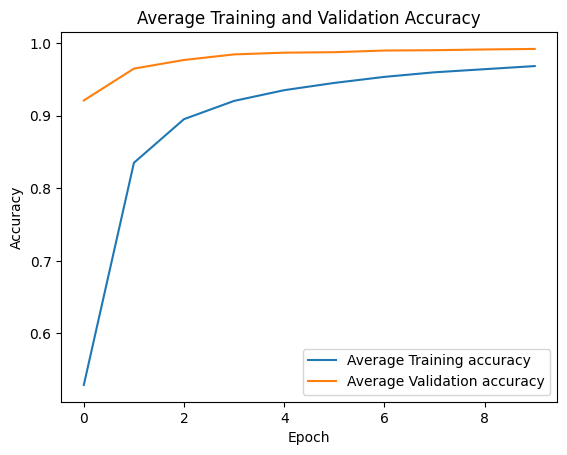

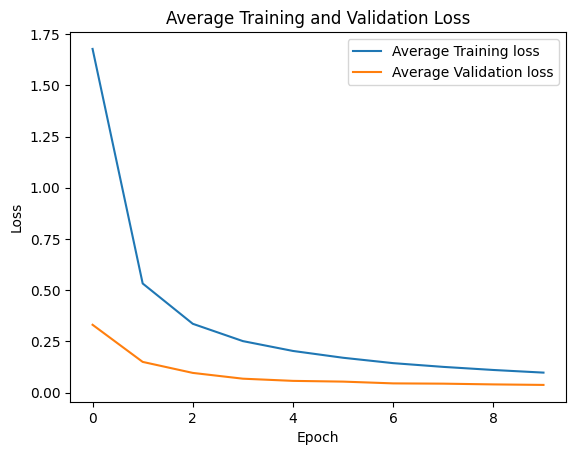

Average F1 Score: 0.9919
Average Accuracy: 0.9919


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score


def load_data_from_file(file='preprocessed_data_cropped.npz'):
    data = np.load(file)
    return data['X'], data['y']

def create_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Load preprocessed data
X, y = load_data_from_file()

#only use train set to validation
X = X[:39209]
y = y[:39209]
# Get input shape and number of classes
input_shape = X.shape[1:]
num_classes = y.shape[1]





# Perform k-fold cross-validation
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
fold = 1
f1_scores = []
accuracies = []
histories = []

for train_idx, val_idx in kfold.split(X, np.argmax(y, axis=1)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_cnn(input_shape, num_classes)

    print(f'Training and evaluating fold {fold}')
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)
    histories.append(history)

    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Calculate performance metrics
    f1 = f1_score(y_true_classes, y_pred_classes, average="weighted")
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    f1_scores.append(f1)
    accuracies.append(accuracy)
    fold += 1

# Calculate average performance metrics
avg_f1_score = np.mean(f1_scores)
avg_accuracy = np.mean(accuracies)

# Compute average training and validation accuracy and loss for each epoch
avg_train_accuracy = np.mean([h.history['accuracy'] for h in histories], axis=0)
avg_val_accuracy = np.mean([h.history['val_accuracy'] for h in histories], axis=0)
avg_train_loss = np.mean([h.history['loss'] for h in histories], axis=0)
avg_val_loss = np.mean([h.history['val_loss'] for h in histories], axis=0)

# Plot average training and validation accuracy
plt.figure()
plt.plot(avg_train_accuracy, label='Average Training accuracy')
plt.plot(avg_val_accuracy, label='Average Validation accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot average training and validation loss
plt.figure()
plt.plot(avg_train_loss, label='Average Training loss')
plt.plot(avg_val_loss, label='Average Validation loss')
plt.title('Average Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Average F1 Score: {:.4f}".format(avg_f1_score))
print("Average Accuracy: {:.4f}".format(avg_accuracy))


C:\Users\brony\anaconda3\envs\myenv37\python.exe E:\41re\cnn.py
2023-04-12 01:39:43.445579: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-12 01:39:43.445853: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-12 01:39:47.329560: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-12 01:39:47.332752: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2023-04-12 01:39:47.369915: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties:
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 Laptop GPU computeCapability: 8.9
coreClock: 2.28GHz coreCount: 58 deviceMemorySize: 11.99GiB deviceMemoryBandwidth: 402.38GiB/s
2023-04-12 01:39:47.370785: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-12 01:39:47.371243: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-04-12 01:39:47.371682: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-04-12 01:39:47.372206: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cufft64_10.dll'; dlerror: cufft64_10.dll not found
2023-04-12 01:39:47.394164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library curand64_10.dll
2023-04-12 01:39:47.394821: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cusolver64_10.dll'; dlerror: cusolver64_10.dll not found
2023-04-12 01:39:47.395150: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cusparse64_11.dll'; dlerror: cusparse64_11.dll not found
2023-04-12 01:39:47.395493: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudnn64_8.dll'; dlerror: cudnn64_8.dll not found
2023-04-12 01:39:47.395575: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1757] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-04-12 01:39:47.397383: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 01:39:47.398999: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-04-12 01:39:47.399070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]
2023-04-12 01:39:47.399119: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
Training and evaluating fold 1
2023-04-12 01:39:47.583413: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
Epoch 1/10
1296/1296 [==============================] - 16s 12ms/step - loss: 2.2260 - accuracy: 0.4020 - val_loss: 0.2848 - val_accuracy: 0.9387
Epoch 2/10
1296/1296 [==============================] - 16s 13ms/step - loss: 0.5317 - accuracy: 0.8330 - val_loss: 0.1148 - val_accuracy: 0.9714
Epoch 3/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.3215 - accuracy: 0.8977 - val_loss: 0.0784 - val_accuracy: 0.9796
Epoch 4/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.2281 - accuracy: 0.9261 - val_loss: 0.0558 - val_accuracy: 0.9862
Epoch 5/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.1861 - accuracy: 0.9406 - val_loss: 0.0547 - val_accuracy: 0.9864
Epoch 6/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.1644 - accuracy: 0.9455 - val_loss: 0.0470 - val_accuracy: 0.9891
Epoch 7/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.1429 - accuracy: 0.9534 - val_loss: 0.0380 - val_accuracy: 0.9915
Epoch 8/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.1178 - accuracy: 0.9611 - val_loss: 0.0418 - val_accuracy: 0.9909
Epoch 9/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.1051 - accuracy: 0.9666 - val_loss: 0.0390 - val_accuracy: 0.9919
Epoch 10/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.0950 - accuracy: 0.9686 - val_loss: 0.0313 - val_accuracy: 0.9932
Training and evaluating fold 2
Epoch 1/10
1296/1296 [==============================] - 16s 12ms/step - loss: 2.2152 - accuracy: 0.4096 - val_loss: 0.1976 - val_accuracy: 0.9492
Epoch 2/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.3990 - accuracy: 0.8771 - val_loss: 0.0954 - val_accuracy: 0.9749
Epoch 3/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.2330 - accuracy: 0.9281 - val_loss: 0.0617 - val_accuracy: 0.9852
Epoch 4/10
1296/1296 [==============================] - 16s 13ms/step - loss: 0.1672 - accuracy: 0.9477 - val_loss: 0.0511 - val_accuracy: 0.9849
Epoch 5/10
1296/1296 [==============================] - 16s 12ms/step - loss: 0.1240 - accuracy: 0.9610 - val_loss: 0.0428 - val_accuracy: 0.9882
Epoch 6/10
1296/1296 [==============================] - 16s 13ms/step - loss: 0.1202 - accuracy: 0.9630 - val_loss: 0.0411 - val_accuracy: 0.9891
Epoch 7/10
1296/1296 [==============================] - 18s 14ms/step - loss: 0.0882 - accuracy: 0.9720 - val_loss: 0.0438 - val_accuracy: 0.9893
Epoch 8/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0857 - accuracy: 0.9735 - val_loss: 0.0346 - val_accuracy: 0.9927
Epoch 9/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0730 - accuracy: 0.9755 - val_loss: 0.0288 - val_accuracy: 0.9932
Epoch 10/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0632 - accuracy: 0.9798 - val_loss: 0.0390 - val_accuracy: 0.9925
Training and evaluating fold 3
Epoch 1/10
1296/1296 [==============================] - 17s 13ms/step - loss: 2.1883 - accuracy: 0.4088 - val_loss: 0.2007 - val_accuracy: 0.9556
Epoch 2/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.4008 - accuracy: 0.8796 - val_loss: 0.0925 - val_accuracy: 0.9740
Epoch 3/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.2464 - accuracy: 0.9225 - val_loss: 0.0737 - val_accuracy: 0.9795
Epoch 4/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1864 - accuracy: 0.9422 - val_loss: 0.0477 - val_accuracy: 0.9876
Epoch 5/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1495 - accuracy: 0.9534 - val_loss: 0.0410 - val_accuracy: 0.9889
Epoch 6/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1145 - accuracy: 0.9645 - val_loss: 0.0365 - val_accuracy: 0.9904
Epoch 7/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0952 - accuracy: 0.9680 - val_loss: 0.0316 - val_accuracy: 0.9930
Epoch 8/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0843 - accuracy: 0.9730 - val_loss: 0.0301 - val_accuracy: 0.9931
Epoch 9/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0767 - accuracy: 0.9751 - val_loss: 0.0326 - val_accuracy: 0.9914
Epoch 10/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.0288 - val_accuracy: 0.9937
Training and evaluating fold 4
Epoch 1/10
1296/1296 [==============================] - 18s 14ms/step - loss: 2.1871 - accuracy: 0.4135 - val_loss: 0.2278 - val_accuracy: 0.9397
Epoch 2/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.4270 - accuracy: 0.8680 - val_loss: 0.1043 - val_accuracy: 0.9783
Epoch 3/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.2513 - accuracy: 0.9224 - val_loss: 0.0694 - val_accuracy: 0.9829
Epoch 4/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1757 - accuracy: 0.9466 - val_loss: 0.0533 - val_accuracy: 0.9866
Epoch 5/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1312 - accuracy: 0.9585 - val_loss: 0.0419 - val_accuracy: 0.9901
Epoch 6/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1217 - accuracy: 0.9610 - val_loss: 0.0398 - val_accuracy: 0.9916
Epoch 7/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1031 - accuracy: 0.9674 - val_loss: 0.0404 - val_accuracy: 0.9917
Epoch 8/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0864 - accuracy: 0.9714 - val_loss: 0.0373 - val_accuracy: 0.9930
Epoch 9/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0782 - accuracy: 0.9750 - val_loss: 0.0357 - val_accuracy: 0.9922
Epoch 10/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.0718 - accuracy: 0.9768 - val_loss: 0.0468 - val_accuracy: 0.9870
Training and evaluating fold 5
Epoch 1/10
1296/1296 [==============================] - 17s 13ms/step - loss: 2.2965 - accuracy: 0.3805 - val_loss: 0.2390 - val_accuracy: 0.9441
Epoch 2/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.4786 - accuracy: 0.8579 - val_loss: 0.1355 - val_accuracy: 0.9678
Epoch 3/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.3086 - accuracy: 0.9051 - val_loss: 0.0772 - val_accuracy: 0.9815
Epoch 4/10
1296/1296 [==============================] - 16s 13ms/step - loss: 0.2325 - accuracy: 0.9269 - val_loss: 0.0540 - val_accuracy: 0.9865
Epoch 5/10
1296/1296 [==============================] - 16s 13ms/step - loss: 0.1791 - accuracy: 0.9456 - val_loss: 0.0528 - val_accuracy: 0.9884
Epoch 6/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1503 - accuracy: 0.9530 - val_loss: 0.0442 - val_accuracy: 0.9894
Epoch 7/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1249 - accuracy: 0.9611 - val_loss: 0.0413 - val_accuracy: 0.9895
Epoch 8/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1114 - accuracy: 0.9649 - val_loss: 0.0416 - val_accuracy: 0.9916
Epoch 9/10
1296/1296 [==============================] - 17s 13ms/step - loss: 0.1012 - accuracy: 0.9669 - val_loss: 0.0408 - val_accuracy: 0.9917
Epoch 10/10
1296/1296 [==============================] - 16s 13ms/step - loss: 0.0907 - accuracy: 0.9707 - val_loss: 0.0346 - val_accuracy: 0.9936
Average F1 Score: 0.9920
Average Accuracy: 0.9920

